In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
upload = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
cost = pd.read_csv("insurance.csv")

In [ ]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Features Analysis
Features = []
_max = []
_min = []
_mean = []
for i in [0,2,3,6]:
    Features.append(cost.columns[i])
    _max.append(cost[cost.columns[i]].max())
    _min.append(cost[cost.columns[i]].min())
    _mean.append(cost[cost.columns[i]].mean())

dict = {'Min': _min, 'Max': _max, 'Mean': _mean}
df = pd.DataFrame(dict,index=Features)
df.round(2)

,Min,Max,Mean
age,18.00,64.00,39.21
bmi,15.96,53.13,30.66
children,0.00,5.00,1.09
charges,1121.87,63770.43,13270.42


In [ ]:
cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
cost.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: title={'center': 'smoker'}, xlabel='smoker', ylabel='count'>

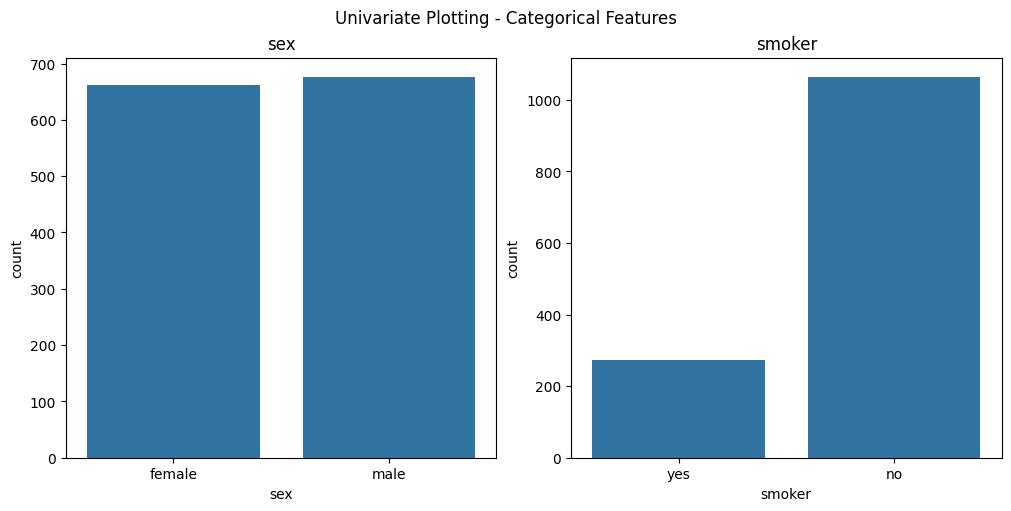

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5),constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("sex")
sns.countplot(data=cost, x='sex', ax=axs[0])

axs[1].set_title("smoker")
sns.countplot(data=cost, x='smoker', ax=axs[1])

<Axes: title={'center': 'children'}, xlabel='children', ylabel='count'>

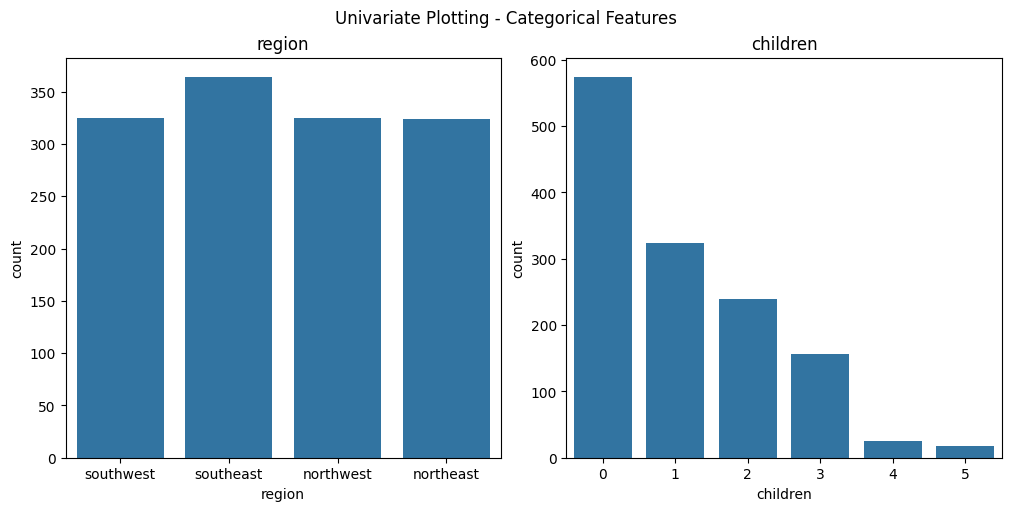

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("region")
sns.countplot(data=cost, x='region', ax=axs[0])

axs[1].set_title("children")
sns.countplot(data=cost, x='children', ax=axs[1])

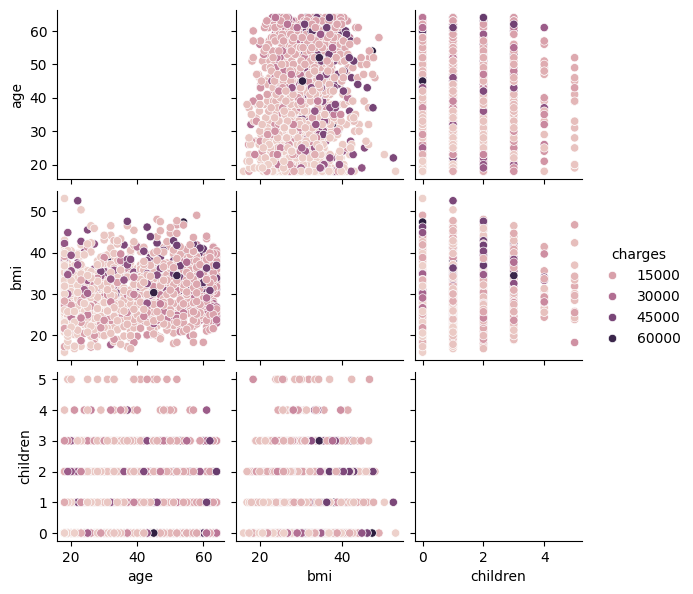

In [ ]:
sns.pairplot(cost,hue='charges',height=2)

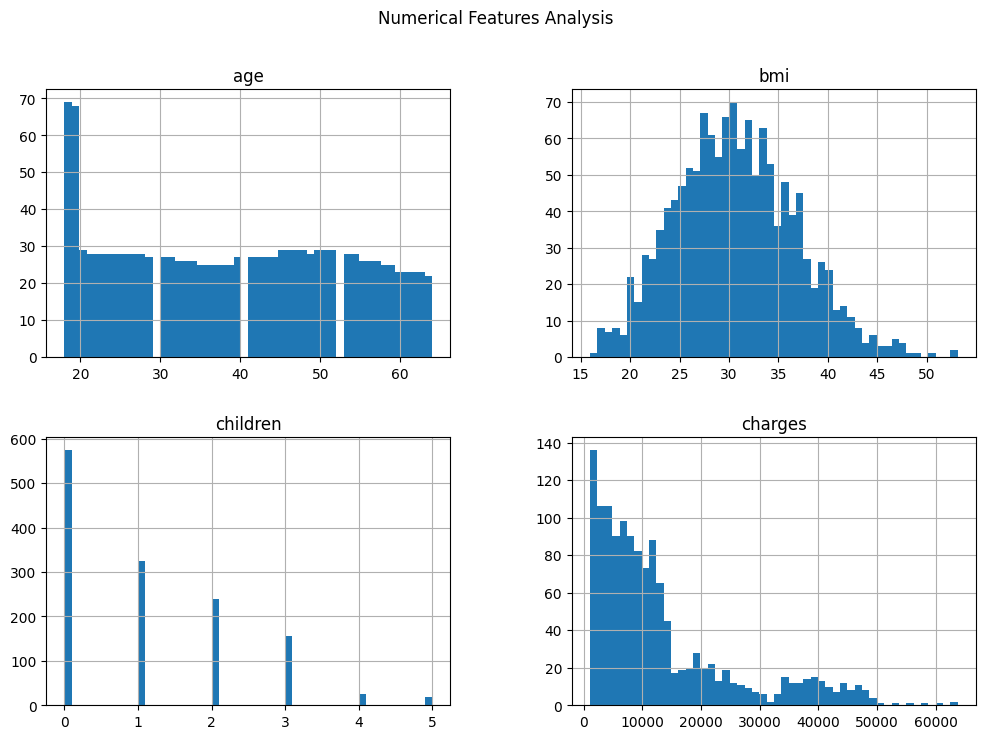

In [ ]:
cost.hist(bins=50, figsize=(12, 8))
plt.suptitle('Numerical Features Analysis')
plt.show()

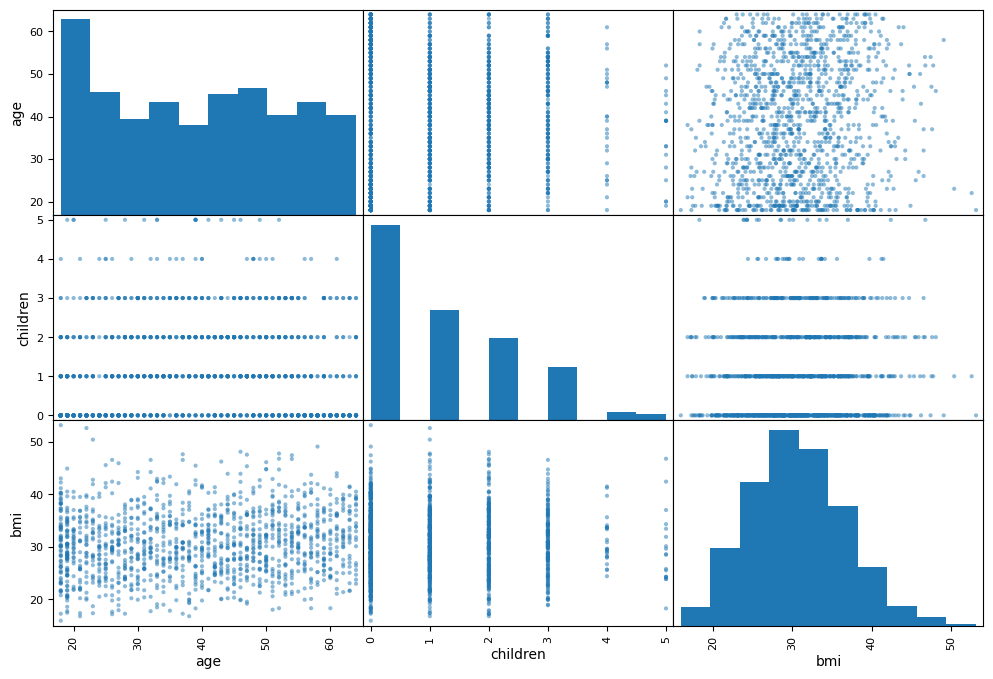

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["age", "children", "bmi"]
scatter_matrix(cost[attributes], figsize=(12, 8))
plt.show()

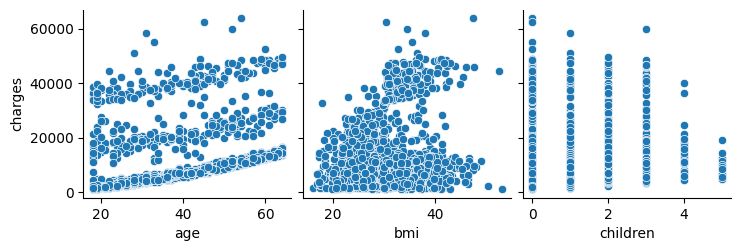

In [ ]:
sns.pairplot(data=cost,
           x_vars=['age', 'bmi', 'children'],
           y_vars='charges')

### Splitting Data

In [ ]:
X = cost.drop(['charges'],axis=1)
y = cost['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

print('Training Data size are',X_train.shape,y_train.shape)
print('Testing Data size are',X_test.shape,y_test.shape)

Training Data size are (1003, 6) (1003,)
Testing Data size are (335, 6) (335,)


### Training Data Preparation

In [ ]:
X_train_cat = X_train[['sex','smoker','region']]
X_train_num = X_train[['age','bmi','children']]

In [ ]:
X_train_cat.nunique()

sex       2
smoker    2
region    4
dtype: int64

In [ ]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

X_train_cat_transformed = X_train_cat.apply(LabelEncoder().fit_transform)

X_train_cat_transformed.head()

,sex,smoker,region
326,0,0,2
1021,0,1,2
1057,0,0,2
197,0,0,2
203,0,1,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
326,-0.903261,-1.231924,-0.070193
1021,-1.257294,0.023446,1.567091
1057,0.371258,0.147215,-0.888834
197,0.371258,-0.365542,0.748449
203,-0.903261,0.836784,-0.888834


In [ ]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
326,-0.903261,-1.231924,-0.070193,0,0,2
1021,-1.257294,0.023446,1.567091,0,1,2
1057,0.371258,0.147215,-0.888834,0,0,2
197,0.371258,-0.365542,0.748449,0,0,2
203,-0.903261,0.836784,-0.888834,0,1,2


### Testiing Data Preparation

In [ ]:
X_test_cat = X_test[['sex','smoker','region']]
X_test_num = X_test[['age','bmi','children']]

In [ ]:
X_test_cat.nunique()

sex       2
smoker    2
region    4
dtype: int64

In [ ]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

X_test_cat_transformed = X_test_cat.apply(LabelEncoder().fit_transform)

X_test_cat_transformed.head()

,sex,smoker,region
918,0,0,3
755,1,0,0
207,1,1,0
520,0,0,0
695,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
918,1.713831,-0.323902,-0.972762
755,-0.479750,-0.422005,0.760617
207,-0.187273,-0.405212,0.760617
520,0.909518,-0.472381,-0.972762
695,-0.845347,1.794576,-0.972762


In [ ]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
918,1.713831,-0.323902,-0.972762,0,0,3
755,-0.479750,-0.422005,0.760617,1,0,0
207,-0.187273,-0.405212,0.760617,1,1,0
520,0.909518,-0.472381,-0.972762,0,0,0
695,-0.845347,1.794576,-0.972762,0,0,1


### Model Training

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

MAE1 = metrics.mean_absolute_error(y_test, y_test_pred)
MSE1 = mean_squared_error(y_test, y_test_pred)
R1 = r2_score(y_test, y_test_pred)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

MAE2 = metrics.mean_absolute_error(y_test,y_test_pred)
MSE2 = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVR
svr = SVR().fit(X_train_transformed, y_train)

from sklearn.metrics import mean_absolute_error
y_pred = svr.predict(X_test_transformed)
MAE3 = mean_absolute_error(y_test, y_pred)
MSE3 = mean_squared_error(y_test, y_test_pred)
R3 = r2_score(y_test, y_test_pred)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

MAE4 = metrics.mean_absolute_error(y_test, y_test_pred)
MSE4 = mean_squared_error(y_test, y_test_pred)
R4 = r2_score(y_test, y_test_pred)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

MAE5 = metrics.mean_absolute_error(y_test, y_test_pred)
MSE5 = mean_squared_error(y_test, y_test_pred)
R5 = r2_score(y_test, y_test_pred)

### Model Performance Analysis

In [ ]:
Performance_data = [['KNN', MAE1, MSE1, R1], ['Linear_Regression', MAE2, MSE2, R2], ['Support_Vector_Machine', MAE3, MSE3, R3],['Decision_Tree', MAE4, MSE4, R4],['Random_Forest', MAE5, MSE5, R5]]

df_Performance = pd.DataFrame(Performance_data, columns=['Algorithm', 'Mean_Absolute_Error', 'Mean_Squared_Error','R2'])

df_Performance

,Algorithm,Mean_Absolute_Error,Mean_Squared_Error,R2
0,KNN,3757.871664,3.368394e+07,0.743428
1,Linear_Regression,4336.352705,3.675712e+07,0.720019
2,Support_Vector_Machine,8041.040517,3.675712e+07,0.720019
3,Decision_Tree,3254.942015,4.047355e+07,0.691711
4,Random_Forest,3273.960236,2.647160e+07,0.798365


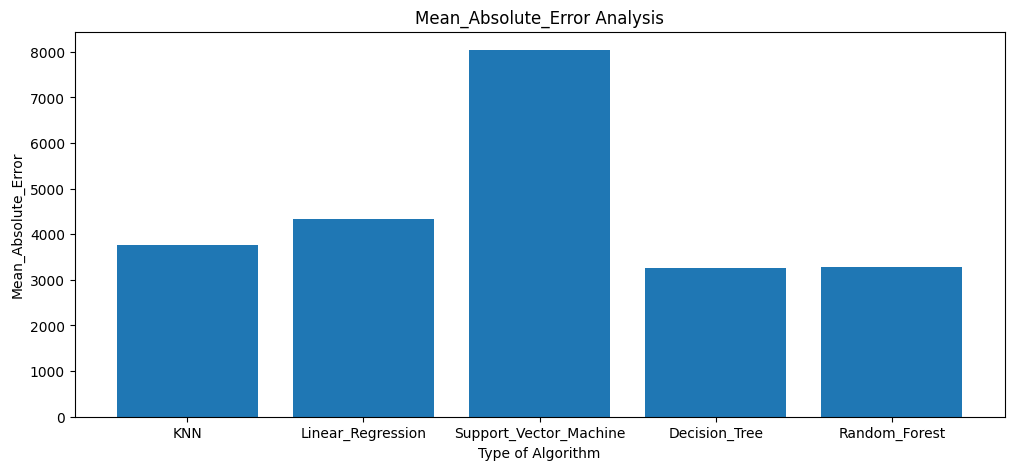

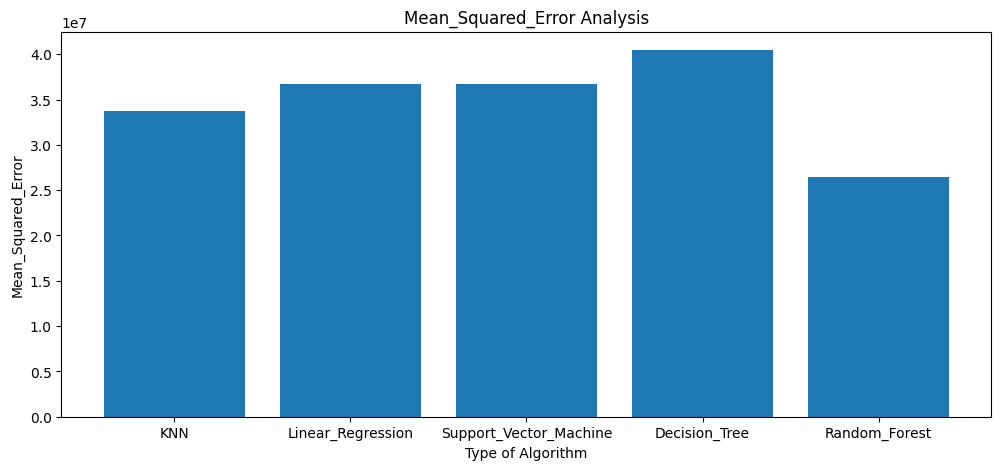

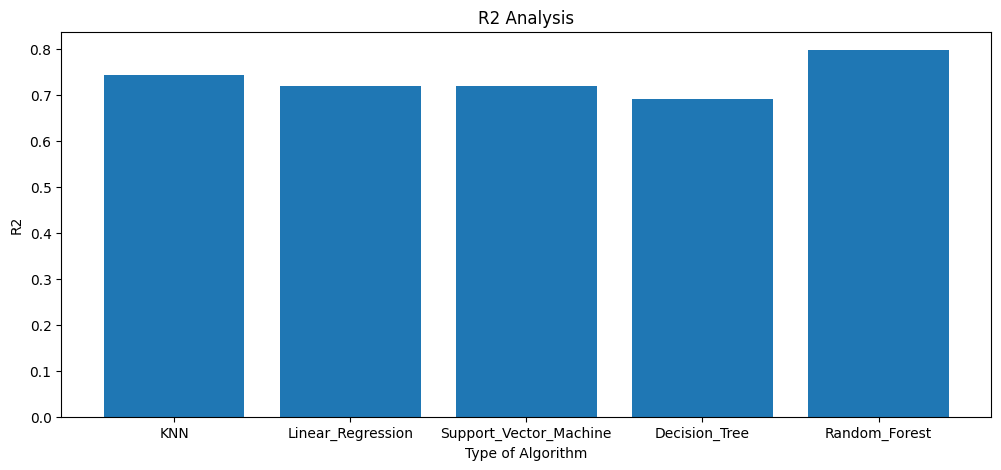

In [ ]:
for i in range (1,4):
    x1 = df_Performance['Algorithm']
    y1 = df_Performance[df_Performance.columns[i]]
    plt.figure(figsize=(12,5))
    plt.title(str(df_Performance.columns[i]+" Analysis"))
    plt.bar(x1,y1)
    plt.xlabel('Type of Algorithm')
    plt.ylabel(df_Performance.columns[i])
    plt.show()